# VirES - access to multi-mission spaceborne magnetic field measurements - public datasets

This notebook demonstrates access to CryoSat-2, GRACE 1/2, GRACE-FO 1/2 and Swarm A/B/C magnetic field measurements avaiable form the public VirES server.

In [1]:
from viresclient import SwarmRequest

SERVER_URL = 'https://vires.services/ows'

In [2]:
from matplotlib.pyplot import subplot, figure

class AttrDict(dict):
    def __getattr__(self, key):
        return self[key]

VECTORS = AttrDict({
    "B_NEC_CHAOS": ["B_N_CHAOS", "B_E_CHAOS", "B_C_CHAOS"],
    "B_NEC": ["B_N", "B_E", "B_C"],
    "B_NEC1": ["B_N1", "B_E1", "B_C1"],
    "B_NEC2": ["B_N2", "B_E2", "B_C2"],
    "B_NEC3": ["B_N3", "B_E3", "B_C3"],
})

def plot_magnetic_data(data, product_type):
    
    def _extract_variables(variables):
        return AttrDict({
            variable: data[variable].values
            for variable in variables if variable in data
        })
    
    def _plot(ax, x, y, title, xlabel, ylabel, **opts):
        ax.plot(x, y, '.', **opts)
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)
        ax.set_ylim([-250, 250])
        ax.set_xlim([-90, 90])
        ax.set_xticks([-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
        ax.grid()
        return ax
        
    coords = _extract_variables(['Timestamp', 'Latitude', 'Longitude', 'Radius', 'QDLat', 'MLT'])
    models = _extract_variables(['F_CHAOS', 'B_NEC_CHAOS'])
    f_variables = _extract_variables(["F"])
    b_variables = _extract_variables(["B_NEC", "B_NEC1", "B_NEC2", "B_NEC3"])
    
    for variable, values in f_variables.items():
        delta = values - models.F_CHAOS
        
        #fig = figure()
        fig = figure(figsize=(18, 2), dpi=100)
        _plot(
            subplot(1, 1, 1),
            coords.QDLat, delta, ms=2,
            title=f'{product_type} - {variable}',
            ylabel=f"{variable} - F_CHAOS / nT",
            xlabel="QD-latitude / deg.",
        )


    for vvariable, values in b_variables.items():
        delta = values - models.B_NEC_CHAOS
        
        for idx, cvariable in enumerate(VECTORS[vvariable]):
        
            fig = figure(figsize=(18, 2), dpi=100)
            ax = subplot(1, 1, 1)
            _plot(
                ax, coords.QDLat, delta[:, idx], ms=2,
                title=f'{product_type} - {vvariable}',
                ylabel=f"{cvariable} - {VECTORS.B_NEC_CHAOS[idx]} / nT",
                xlabel="QD-latitude / deg.",
            )

## CryoSat-2 Data

avaiable data: 2010-04-08/2021-04-28

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (2.785MB)

<xarray.Dataset>
Dimensions:      (Timestamp: 8640, B_FGM3_dim1: 3, B_FGM2_dim1: 3, NEC: 3,
                  B_mod_NEC_dim1: 3, B_FGM1_dim1: 3, quaternion: 4)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2016-01-01T00:00:05.272000 ... 20...
  * NEC          (NEC) <U1 'N' 'E' 'C'
  * quaternion   (quaternion) <U1 '1' 'i' 'j' 'k'
Dimensions without coordinates: B_FGM3_dim1, B_FGM2_dim1, B_mod_NEC_dim1,
                                B_FGM1_dim1
Data variables: (12/19)
    Spacecraft   (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    B_FGM3       (Timestamp, B_FGM3_dim1) float64 2.19e+03 ... 3.642e+04
    QDLat        (Timestamp) float64 -70.0 -70.76 -71.27 ... 63.22 63.76 64.57
    B_FGM2       (Timestamp, B_FGM2_dim1) float64 -2.119e+03 ... -3.393e+04
    B_NEC        (Timestamp, NEC) float64 nan nan nan 3.498e+03 ... nan nan nan
    q_error      (Timestamp) float64 4.642 5.272 5.717 ... 6.663 6.496 6.37
    ...           ...
    B_FGM1       (Timestamp, 

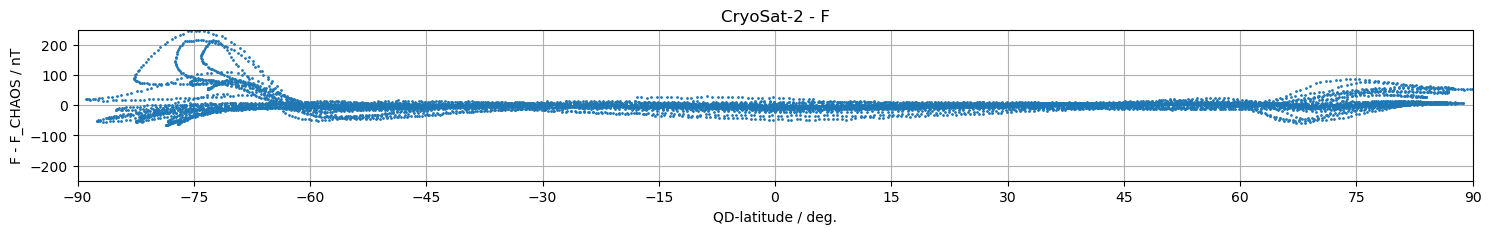

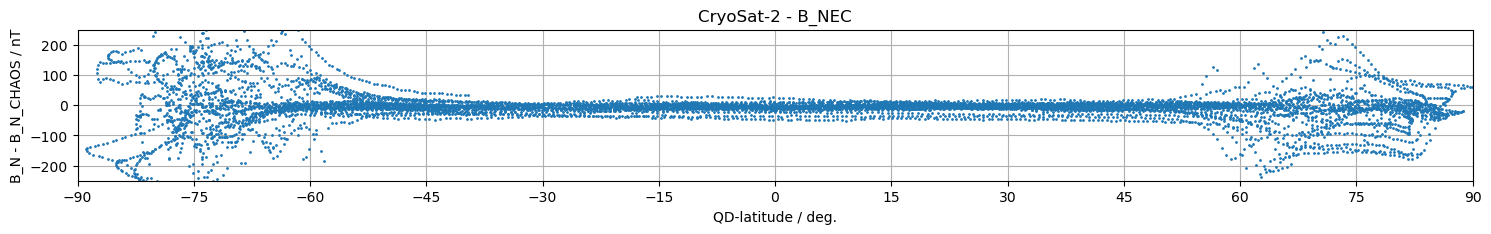

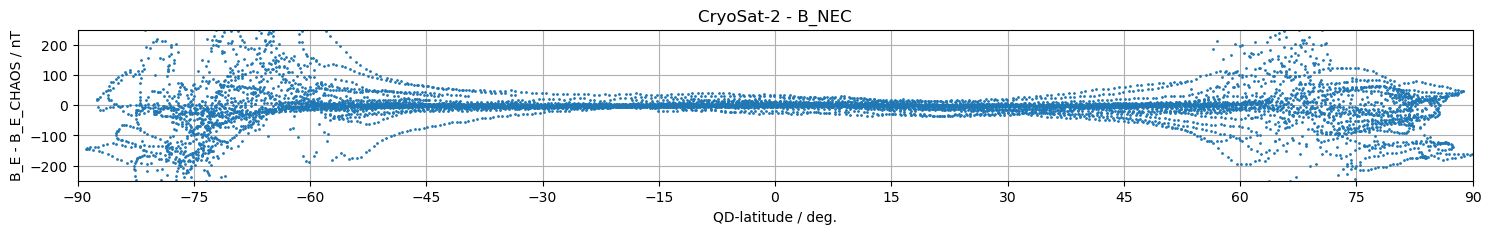

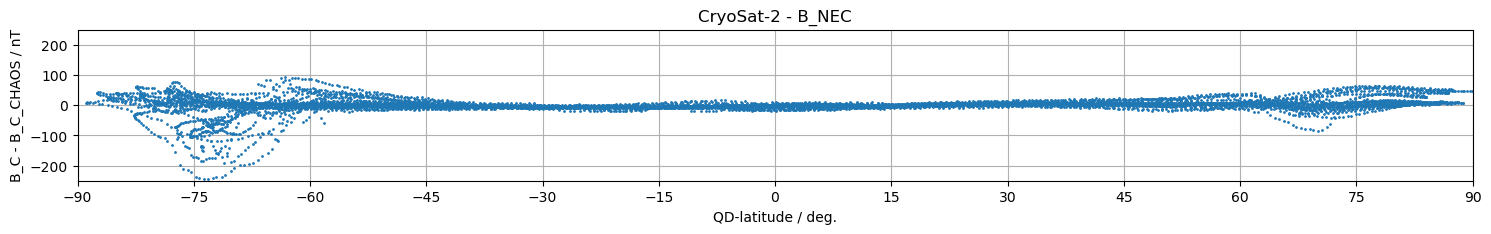

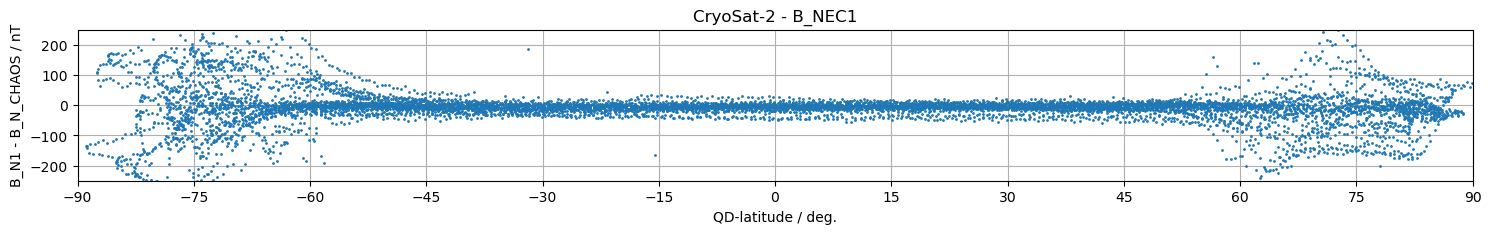

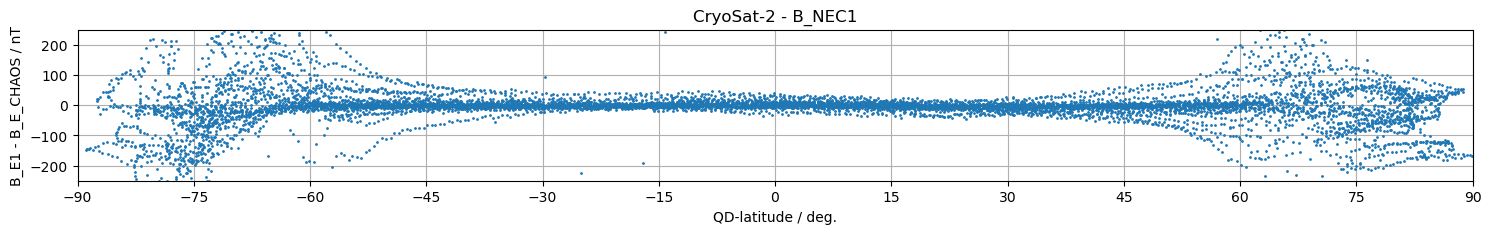

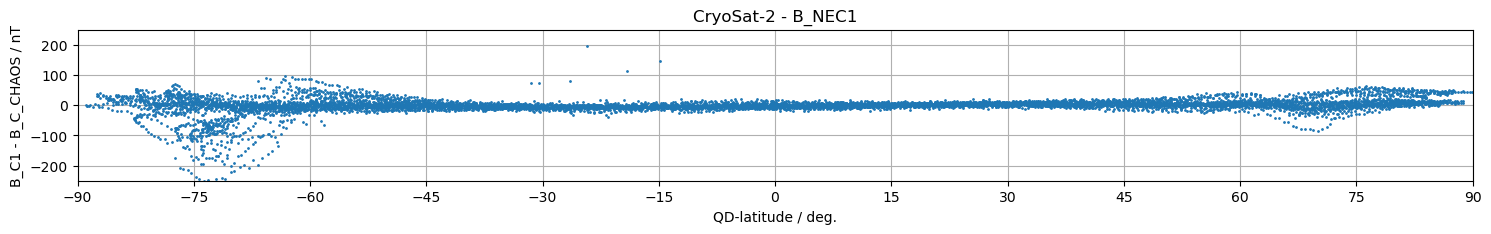

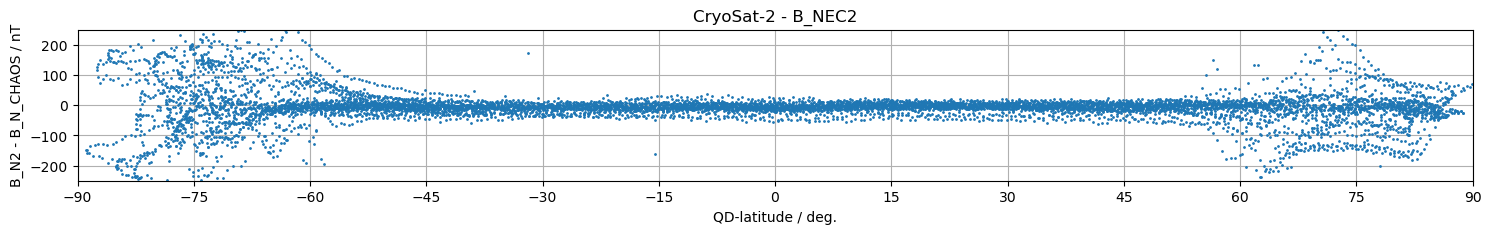

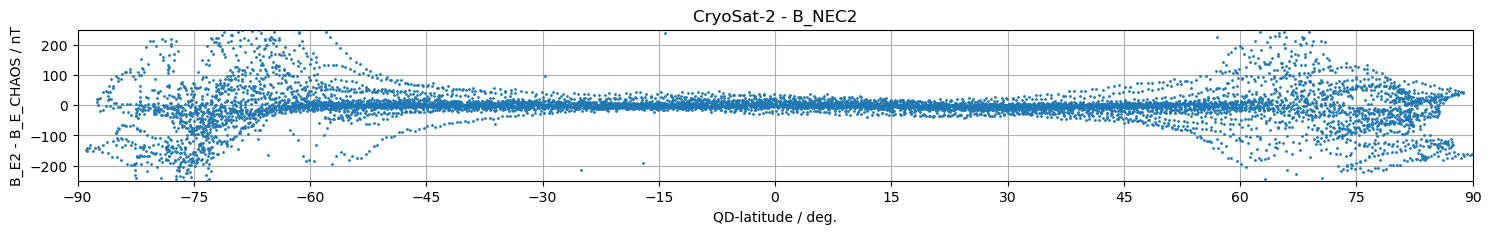

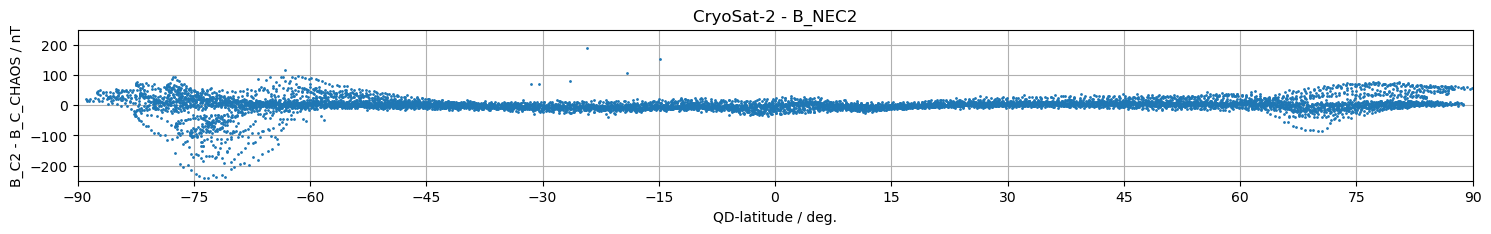

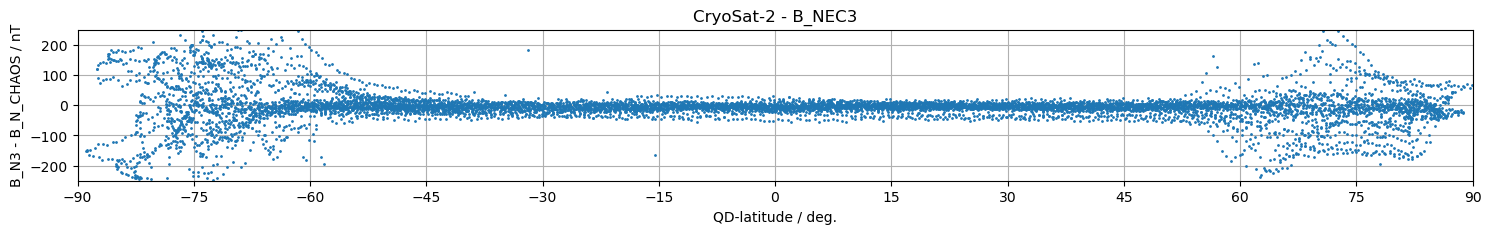

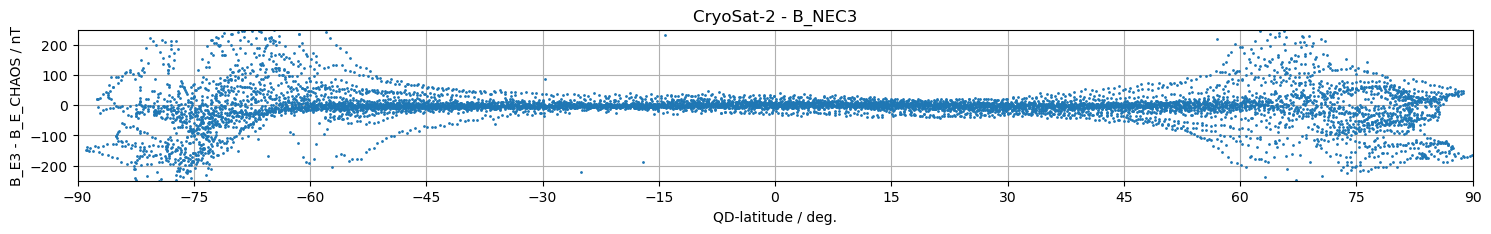

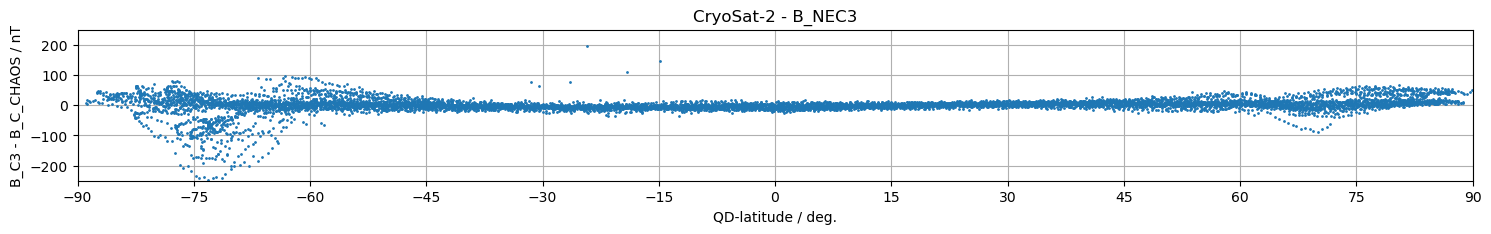

In [3]:
request = SwarmRequest(SERVER_URL)
request.set_collection("CS_OPER_MAG")
request.set_products(
    measurements=request.PRODUCT_VARIABLES['MAG_CS'],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT4S", # ~0.25Hz sampling
)

data = request.get_between(
    start_time="2016-01-01T00:00:00Z",
    end_time="2016-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'CryoSat-2')

## GOCE
avaiable data: 2009-11-01/2013-09-30

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (2.425MB)

<xarray.Dataset>
Dimensions:        (Timestamp: 5397, dB_NY_SC_dim1: 3, dB_MTQ_SC_dim1: 3,
                    dB_HK_SC_dim1: 3, dB_BT_SC_dim1: 3, dB_XI_SC_dim1: 3,
                    NEC: 3, dB_SA_SC_dim1: 3, dB_BLOCK_CORR_dim1: 6,
                    dB_BAT_SC_dim1: 3, B_MAG_dim1: 3, q_SC_NEC_dim1: 4,
                    q_MAG_SC_dim1: 4, dB_ST_SC_dim1: 3)
Coordinates:
  * Timestamp      (Timestamp) datetime64[ns] 2010-01-01T00:00:08.392000 ... ...
  * NEC            (NEC) <U1 'N' 'E' 'C'
Dimensions without coordinates: dB_NY_SC_dim1, dB_MTQ_SC_dim1, dB_HK_SC_dim1,
                                dB_BT_SC_dim1, dB_XI_SC_dim1, dB_SA_SC_dim1,
                                dB_BLOCK_CORR_dim1, dB_BAT_SC_dim1, B_MAG_dim1,
                                q_SC_NEC_dim1, q_MAG_SC_dim1, dB_ST_SC_dim1
Data variables: (12/23)
    Spacecraft     (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-'
    dB_NY_SC       (Timestamp, dB_NY_SC_dim1) float64 -12.6 7.02 ... -2.937
    B_FLAG    

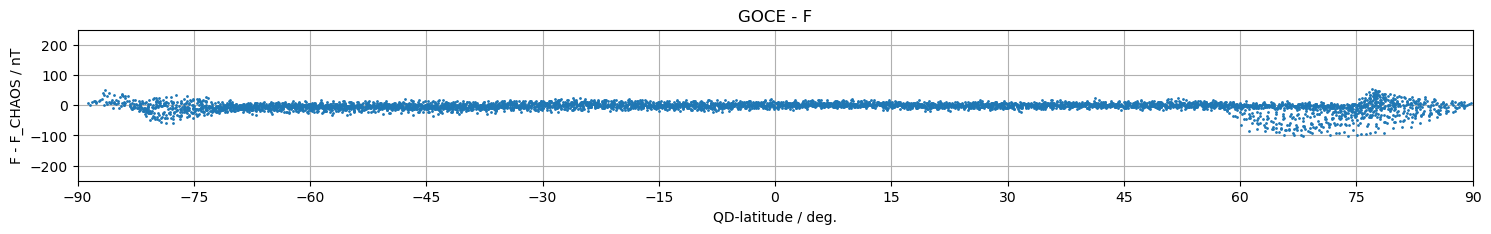

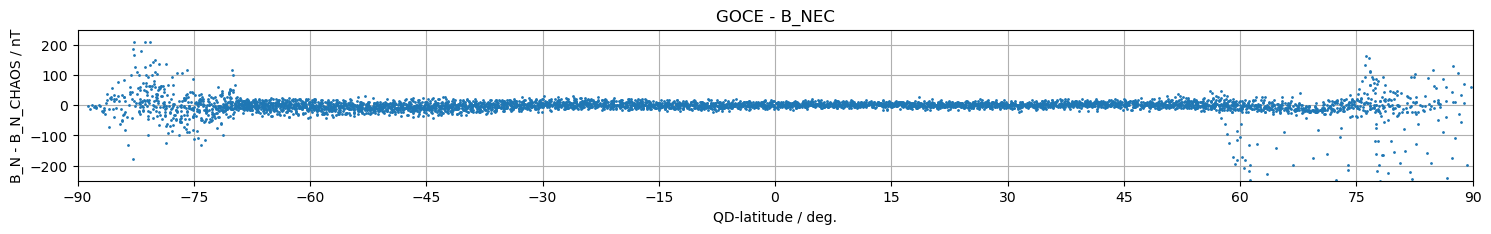

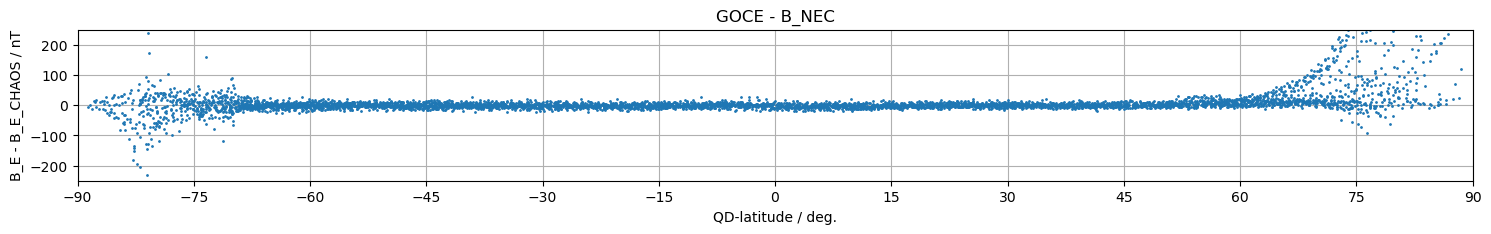

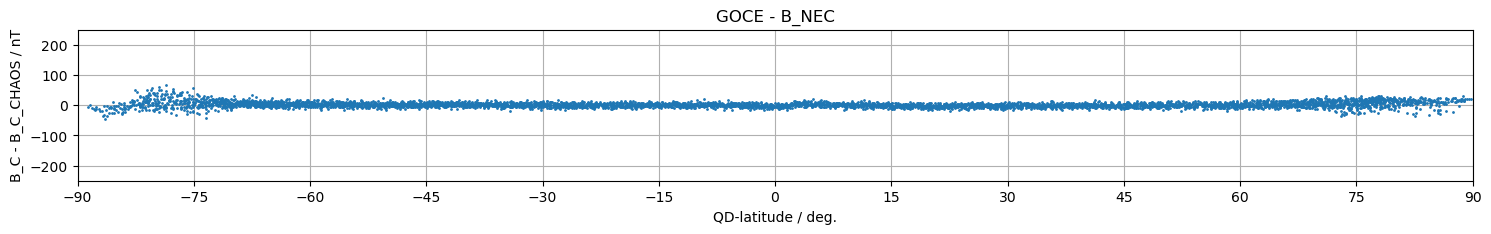

In [4]:
from viresclient import SwarmRequest

request = SwarmRequest(SERVER_URL)
request.set_collection("GO_MAG_ACAL_CORR")
request.set_products(
    measurements=request.PRODUCT_VARIABLES['MAG_GOCE'],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT16S",
)

# get data with valid position only
request.set_bitmask_filter("B_FLAG", selection=0x00, mask=0x80)

data = request.get_between(
    start_time="2010-01-01T00:00:00Z",
    end_time="2010-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'GOCE')

## GRACE 1 and 2
avaiable data: 
- GRACE 1: 2008-01-01/2017-10-31
- GRACE 1: 2008-01-01/2017-09-04

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (3.351MB)

<xarray.Dataset>
Dimensions:      (Timestamp: 16624, NEC: 3, B_FGM_dim1: 3, quaternion: 4)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2016-01-01T00:00:01.899195136 ......
  * NEC          (NEC) <U1 'N' 'E' 'C'
  * quaternion   (quaternion) <U1 '1' 'i' 'j' 'k'
Dimensions without coordinates: B_FGM_dim1
Data variables: (12/14)
    Spacecraft   (Timestamp) object '1' '1' '1' '1' '1' ... '2' '2' '2' '2' '2'
    B_NEC_raw    (Timestamp, NEC) float64 1.396e+04 6.635e+03 ... 2.424e+04
    Latitude     (Timestamp) float64 -78.41 -77.57 -76.73 ... 27.21 26.55 25.9
    B_FGM        (Timestamp, B_FGM_dim1) float64 1.39e+04 ... 2.365e+04
    B_NEC_CHAOS  (Timestamp, NEC) float64 1.376e+04 6.55e+03 ... 2.423e+04
    QDLat        (Timestamp) float64 -63.78 -62.98 -62.19 ... 21.24 20.55 19.87
    ...           ...
    F            (Timestamp) float64 4.014e+04 3.968e+04 ... 3.872e+04 3.843e+04
    q_error      (Timestamp) float64 3.562e-05 7.145e-05 ... 5.866e-05 5.851e-05
    MLT      

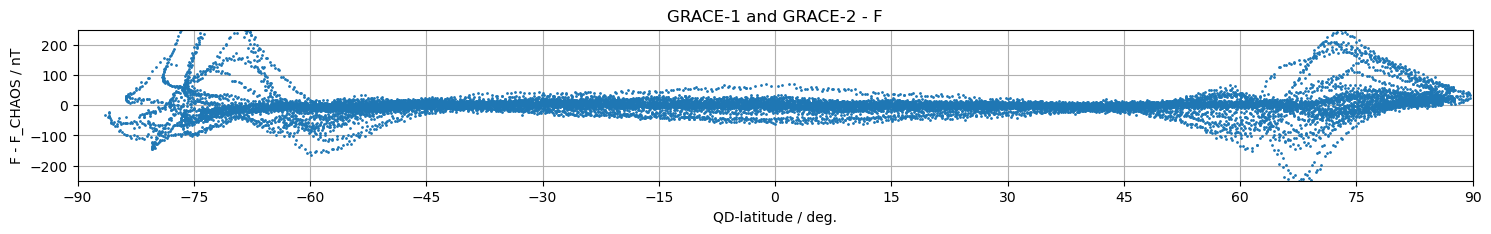

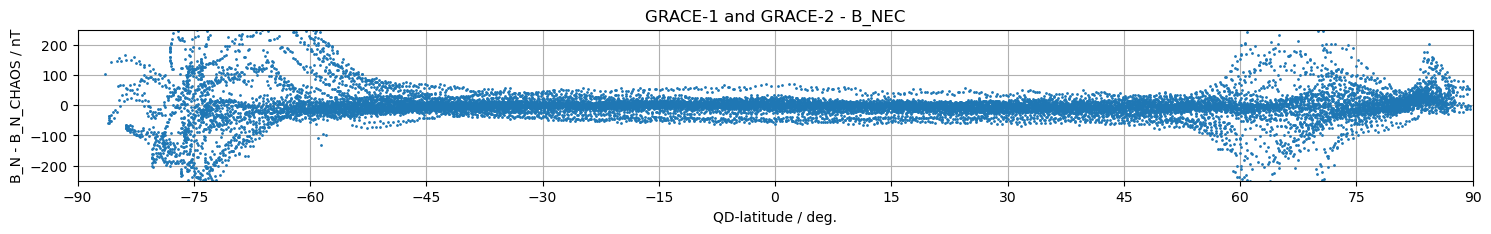

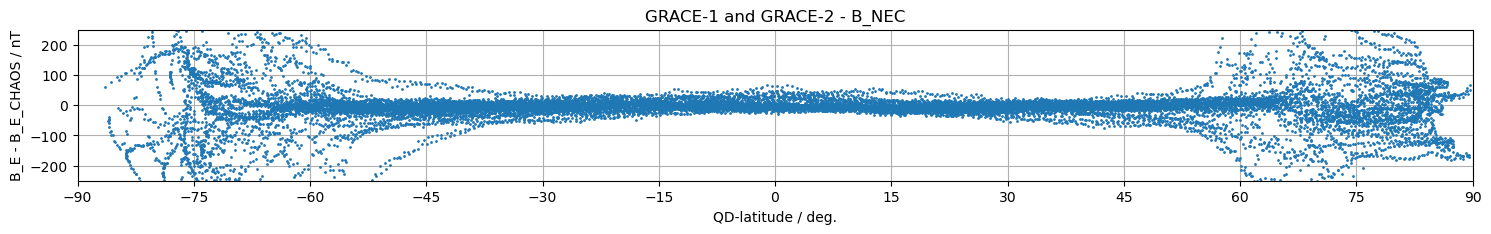

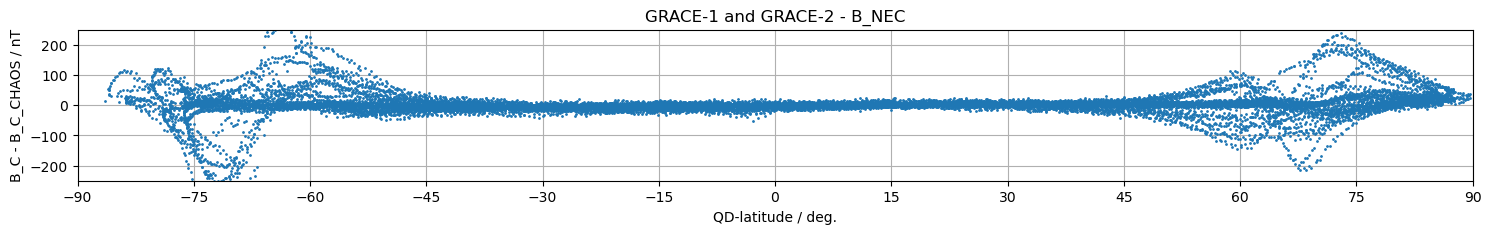

In [5]:
request = SwarmRequest(SERVER_URL)
request.set_collection("GRACE_A_MAG", "GRACE_B_MAG") # request data from both GRACE 1 and 2 spacecrafts
#request.set_collection("GRACE_A_MAG") # request data from GRACE 1 spacecraft only
#request.set_collection("GRACE_B_MAG") # request data from GRACE 2 spacecraft only
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG_GRACE"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2016-01-01T00:00:00Z",
    end_time="2016-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'GRACE-1 and GRACE-2')

## GRACE-FO 1 and 2
avaiable data:
- GRACE-FO 1: 2018-06-01/2022-06-30
- GRACE-FO 2: 2018-06-01/2022-06-30

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (5.859MB)

<xarray.Dataset>
Dimensions:      (Timestamp: 17280, NEC: 3, dB_SA_FGM_dim1: 3,
                  q_NEC_FGM_dim1: 4, dB_BT_FGM_dim1: 3, dB_MTQ_FGM_dim1: 3,
                  dB_XI_FGM_dim1: 3, B_FGM_dim1: 3, dB_BAT_FGM_dim1: 3,
                  dB_ST_FGM_dim1: 3, dB_NY_FGM_dim1: 3)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2019-01-01 ... 2019-01-01T23:59:50
  * NEC          (NEC) <U1 'N' 'E' 'C'
Dimensions without coordinates: dB_SA_FGM_dim1, q_NEC_FGM_dim1, dB_BT_FGM_dim1,
                                dB_MTQ_FGM_dim1, dB_XI_FGM_dim1, B_FGM_dim1,
                                dB_BAT_FGM_dim1, dB_ST_FGM_dim1, dB_NY_FGM_dim1
Data variables: (12/20)
    Spacecraft   (Timestamp) object '1' '1' '1' '1' '1' ... '2' '2' '2' '2' '2'
    B_FLAG       (Timestamp) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    QDLat        (Timestamp) float64 -15.34 -15.93 -16.53 ... -84.75 -84.64
    B_NEC        (Timestamp, NEC) float64 1.704e+04 -557.4 ... -4.613e+04
    F_CHAOS  

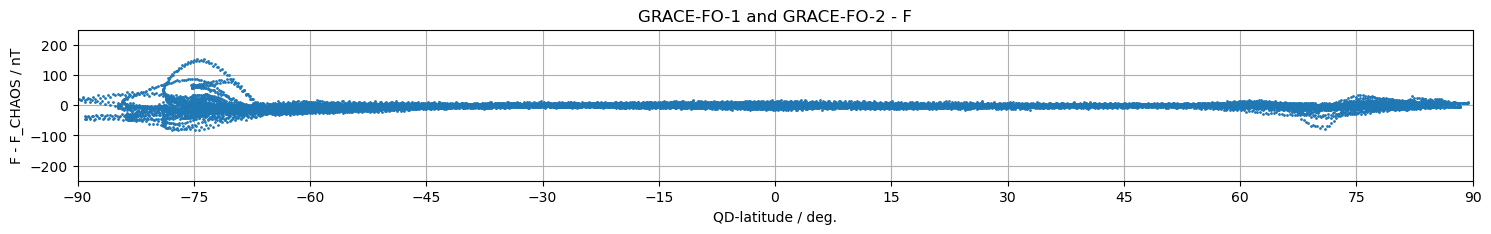

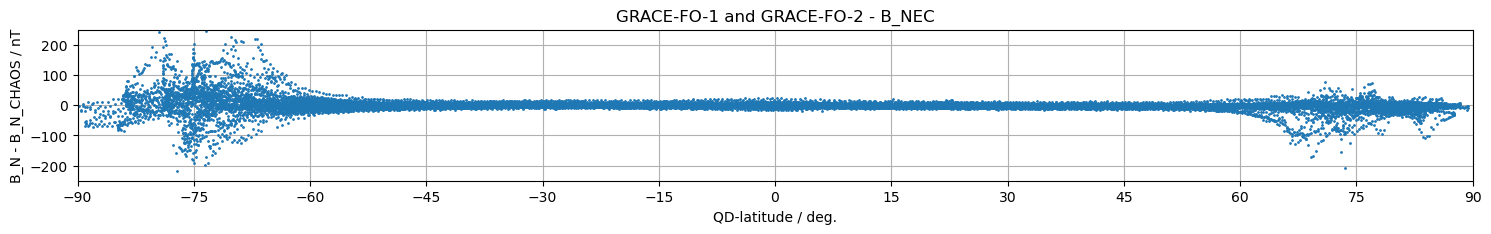

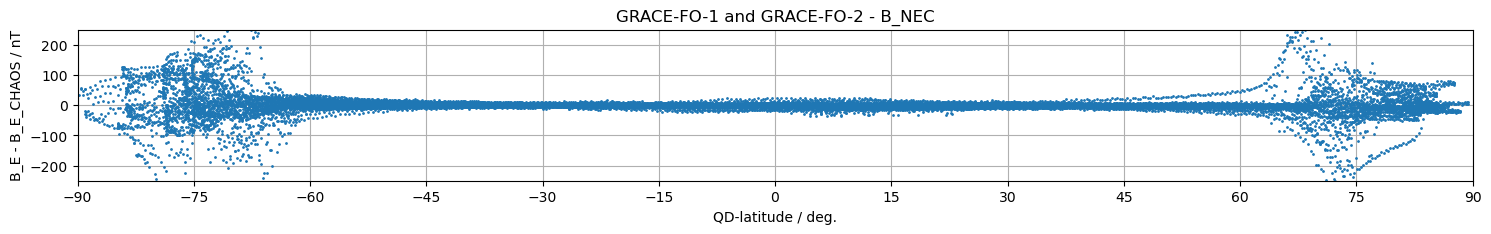

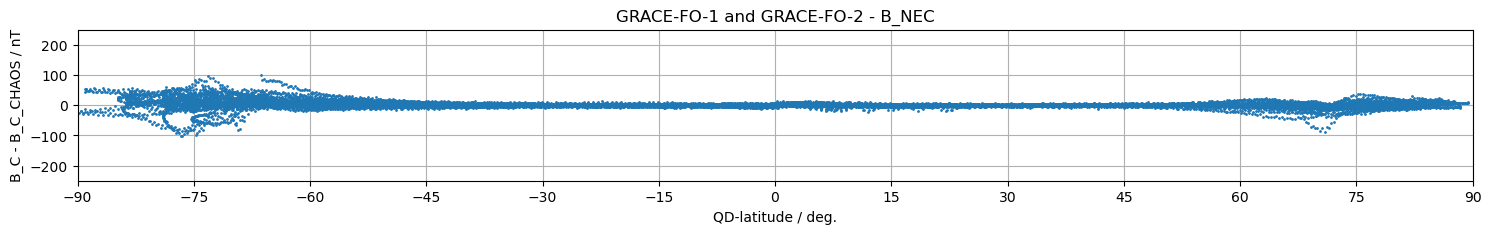

In [6]:
request = SwarmRequest(SERVER_URL)

request.set_collection("GF1_OPER_FGM_ACAL_CORR", "GF2_OPER_FGM_ACAL_CORR") # request data from both GRACE-FO 1 and 2 spacecrafts
#request.set_collection("GF1_OPER_FGM_ACAL_CORR") # request data from GRACE-FO 1 spacecraft only
#request.set_collection("GF2_OPER_FGM_ACAL_CORR") # request data from GRACE-FO 2 spacecraft only

request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG_GFO"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'GRACE-FO-1 and GRACE-FO-2')

## Swarm A, B and C MAG LR 1Hz - regular products

In [ ]:
request = SwarmRequest(SERVER_URL)
request.set_collection(*SwarmRequest.COLLECTIONS["MAG"])
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'Swarm-A, Swarm-B and Swarm-C LR')

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

## Swarm A, B and C MAG HR 1Hz - regular products

In [ ]:
request = SwarmRequest(SERVER_URL)
request.set_collection(*SwarmRequest.COLLECTIONS["MAG_HR"])
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG_HR"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT0.02S", # ~50Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'Swarm-A, Swarm-B and Swarm-C HR')